In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import re 
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
t_d = pd.read_csv('IMDB Dataset.csv', encoding = 'utf-8')
t_d

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
t_d.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
st = set(stopwords.words('english'))
p_ck = list(punctuation)
st.update(p_ck)

In [11]:
def 웹문서_처리(t):
    su = BeautifulSoup(t, 'html.parser')
    return su.get_text()

def 정규표현_정리(t):
    return re.sub('\[[^]*\]', '', t)

def 불필요_정리(t):
    return re.sub(r'http\S+', '', t)

def 불용어_처리(t):
    f_l = []
    for i in t.split():
        if i.strip().lower() not in st and i.strip().lower().isalpha():
            f_l.append(i.strip().lower())
    return ' '.join(f_l)

def 전체_처리(t):
    t = 웹문서_처리(t)
    t = 불필요_정리(t)
    t = 불용어_처리(t)
    return t

In [13]:
t_d['review'] = t_d['review'].apply(전체_처리)
t_d['review']

0        one reviewers mentioned watching oz episode ex...
1        wonderful little filming technique fashion giv...
2        thought wonderful way spend time hot summer si...
3        basically family little boy thinks zombie clos...
4        petter time visually stunning film mattei offe...
                               ...                        
49995    thought movie right good creative original exp...
49996    bad bad bad idiotic annoying porn groove sound...
49997    catholic taught parochial elementary schools t...
49998    going disagree previous comment side maltin se...
49999    one expects star trek movies high fans expect ...
Name: review, Length: 50000, dtype: object

In [14]:
t_d

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,positive
1,wonderful little filming technique fashion giv...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy thinks zombie clos...,negative
4,petter time visually stunning film mattei offe...,positive
...,...,...
49995,thought movie right good creative original exp...,positive
49996,bad bad bad idiotic annoying porn groove sound...,negative
49997,catholic taught parochial elementary schools t...,negative
49998,going disagree previous comment side maltin se...,negative


In [15]:
t_d.sentiment.replace('positive', 1, inplace = True)
t_d.sentiment.replace('negative', 0, inplace = True)

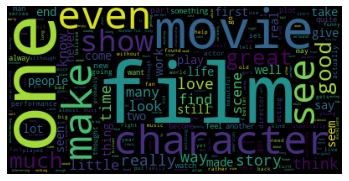

In [16]:
wc = WordCloud(max_words = 2000).generate(' '.join(t_d[t_d.sentiment == 1].review))
plt.imshow(wc)
plt.axis('off')
plt.show()

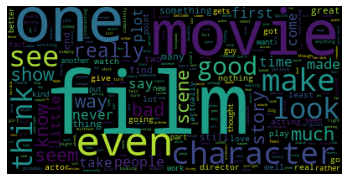

In [17]:
wc = WordCloud(max_words = 2000).generate(' '.join(t_d[t_d.sentiment == 0].review))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
t_l_0 = t_d[t_d.sentiment == 0]['review'].str.len()
t_l_1 = t_d[t_d.sentiment == 1]['review'].str.len()

3        347
7        412
8        320
10       290
11       435
        ... 
49994    263
49996    298
49997    634
49998    682
49999    332
Name: review, Length: 25000, dtype: int64

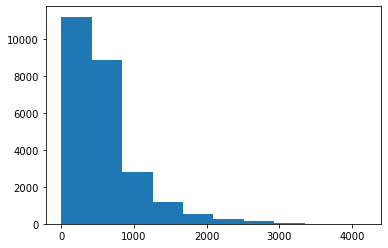

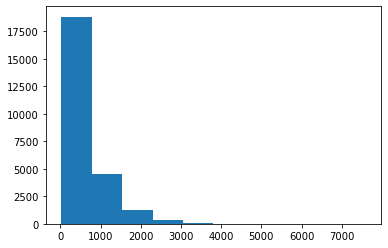

In [22]:
plt.hist(t_l_0)
plt.show()

plt.hist(t_l_1)
plt.show()

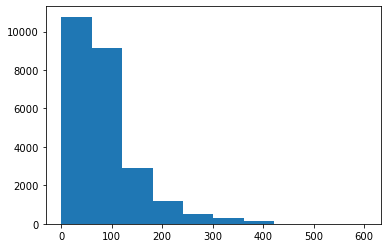

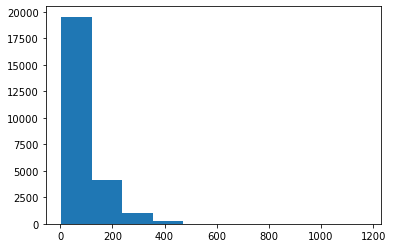

In [24]:
t_l_0 = t_d[t_d.sentiment == 0]['review'].str.split().map(lambda x: len(x))
t_l_1 = t_d[t_d.sentiment == 1]['review'].str.split().map(lambda x: len(x))

plt.hist(t_l_0)
plt.show()

plt.hist(t_l_1)
plt.show()

C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review', ylabel='Density'>

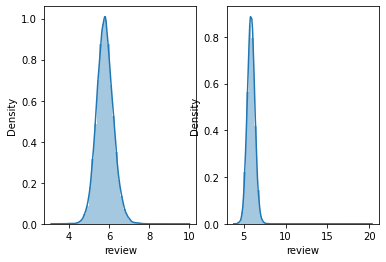

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2)

t_l_0 = t_d[t_d.sentiment == 0]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(t_l_0.map(lambda x: np.mean(x)), ax = ax1)
t_l_1 = t_d[t_d.sentiment == 1]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(t_l_1.map(lambda x: np.mean(x)), ax = ax2)

In [30]:
def N_gram(t, n, g):
    tv = CountVectorizer(ngram_range = (g, g)).fit(t)
    BoW = tv.transform(t)
    sum_BoW = BoW.sum(axis = 0)
    w_f = [(w, sum_BoW[0, i]) for w, i in tv.vocabulary_.items()]
    w_f = sorted(w_f, key = lambda x: x[1], reverse = True)
    return w_f[:n]

In [31]:
N_gram(t_d.review, 20, 1)

[('movie', 61496),
 ('film', 55088),
 ('one', 45067),
 ('like', 37303),
 ('would', 23815),
 ('even', 23720),
 ('good', 23475),
 ('really', 21806),
 ('see', 20906),
 ('get', 17692),
 ('much', 17294),
 ('story', 16812),
 ('also', 15775),
 ('time', 15660),
 ('first', 15475),
 ('great', 15475),
 ('people', 15036),
 ('make', 15030),
 ('could', 14929),
 ('made', 13562)]